# Blackbody Radiation

The absorption and emission of energy from objects on Earth and in space is at the heart of remote sensing. One helpful concept in assessing enery absorption and emission is a **blackbody** - an idealized object that absorbs light at all frequencies. While no object is a perfect blackbody, many objects including our sun and the Earth can be approximated well by the theoretical laws derived for them. On this page, we will look at *Planck's Law*, describing the electromagnetic radation emitted by a blackbody as well as two additional laws derived from Planck's Law.

To begin, let's import two Python packages that will allow us to make simple calculations and create figures:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Planck's Law

At a constant temperature, the emission of energy from a black body follows a spectrum that is determined by it's temperature. This spectrum is given by Planck's Law, which describes the spectral density of electromagnetic radiation as

$$
F_p(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda k_B T} \right) -1}
$$

where

- $\lambda$ is the wavelength (m)
- $T$ is the temperature (K)
- $c$ is the speed of light ($2.9979 \times 10^8$ m/s)
- $h$ is the Planck constant ($6.626 \times 10^{-34}$ J$\cdot$s)
- $k_B$ is the Boltzmann constant ($1.380 \times 10^{-23}$ J/K)

This distribution can be visualized as across the UV, visible, and infrared spectrum for different temperatures as follows:

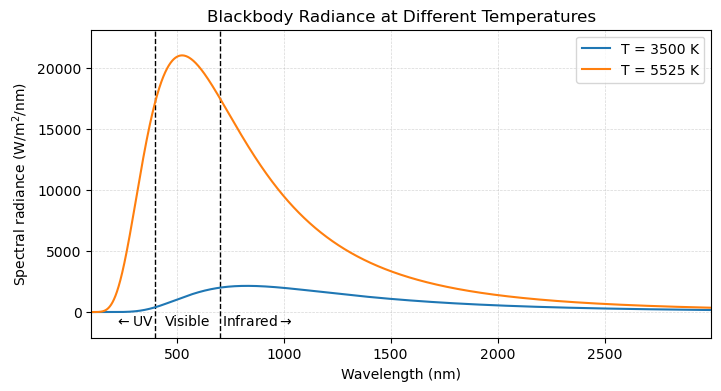

In [2]:
# make a Planck's law function
def plancks_law(lamb,T):
    c = 2.9979e8 # speed of light (m/s)
    h = 6.626e-34 # Planck constant (J s)
    kB = 1.380e-23 # Boltzmann constant (J/K)
    Fb = (2*h*c**2/lamb**5)*(1/(np.exp(h*c/(lamb*kB*T))-1))
    return(Fb)

# compute Planck's law for a given temperature
lamb = np.arange(100,3000)*1e-9
Fp_hot = plancks_law(lamb, T=5525)
Fp_cold = plancks_law(lamb, T=3500)

# make a plot
fig = plt.figure(figsize=(8,4))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral radiance (W/m$^2$/nm)')
y_min = -0.1*np.max(Fp_hot*1e-9)
y_max = 1.1*np.max(Fp_hot*1e-9)
plt.plot(400*np.ones((50,)), np.linspace(y_min,y_max), 'k--', linewidth=1)
plt.plot(700*np.ones((50,)), np.linspace(y_min,y_max), 'k--', linewidth=1)
plt.text(550,0.5*y_min, 'Visible',ha='center')
plt.text(390,0.5*y_min, '$\leftarrow$UV',ha='right')
plt.text(710,0.5*y_min, 'Infrared$\\rightarrow$')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.plot(lamb*1e9, Fp_cold*1e-9, label='T = 3500 K')
plt.plot(lamb*1e9, Fp_hot*1e-9, label='T = 5525 K')
plt.title('Blackbody Radiance at Different Temperatures')
plt.gca().set_ylim([y_min, y_max])
plt.gca().set_xlim([np.min(lamb*1e9), np.max(lamb*1e9)])
plt.legend()
plt.show()

In the above plot, we can make two key observations. First, the hotter an object, the more energy is being emitted. This is observed by the magnitude of the spectral radiance at each wavelength, measured on the $y$-axis. Second, hotter objects emit their peak energy at lower wavelengths than colder object. For the example given above, the object at $T = 5525$ K has a peak emission in the visible part of the electromagnetic spectrum while the cold object reaches a peak in the infrared part of the spectrum. Both of these observations, discussed below, can be quantified from Planck's Law.

## Stefan-Boltzmann Law

Another facet of a blackbody is that it emits energy equally in all directions. To quantify this energy flux, Planck's Law can be integrated across all wavlengths. It turns out that this derivation is quite "involved" but the the resultant equation, called the Stefan-Boltzmann Law, takes a fairly simple form:

$$
F = \sigma T^4
$$

where $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$. This law tells us that the energy emitted by a blackbody increases as temperature increases.

We can visualize this energy flux per unit area in a plot, similar to that above:

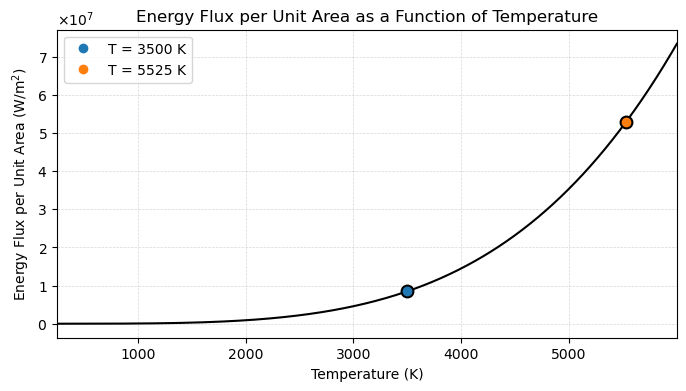

In [3]:
# make a quick computation
sigma = 5.67e-8
T = np.arange(250,6000)
F = sigma*T**4

# make a plot
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(8,4))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.plot(T,F, 'k-')
plt.plot(3500, sigma*3500**4, 'ko', markersize=9)
plt.plot(5525, sigma*5525**4, 'ko', markersize=9)
plt.plot(3500, sigma*3500**4, 'o', label='T = 3500 K')
plt.plot(5525, sigma*5525**4, 'o', label='T = 5525 K')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy Flux per Unit Area (W/m$^2$)')
plt.gca().set_xlim([np.min(T), np.max(T)])
plt.title('Energy Flux per Unit Area as a Function of Temperature')
plt.legend()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()

As we can see from Wien's Law, the object with a temperature of 5525 K plotted above emits about 5 times more energy than the object at 3500 K. This can be seen visually be comparing the areas under the curve in the plot demonstrating Planck's Law above.

Next, we compare the wavelengths emitted by these objects.

## Wien's Law
As we can see in the curves of spectral radiance in the plot for Planck's function above, objects of different temperatures reach peak radiance at different parts of the electromagnetic spectrum. A function for the wavelength at which an object of given temperature reaches peak radiance can be found by finding the maximum of Planck's Law. From calculus, this can be accomplished by taking a derivative of Planck's Law relative to temperature and finding where the derivative is 0. Again, the derivation is quite involved and is omitted here, but it leads to a relatively simple relationship, known as Wien's Law:

$$
\lambda_{\text{peak}} = \frac{b}{T}
$$

where $b = 2.898 \times 10^{-3}$ m$\cdot$K. From this relationship, we can see that the peak wavelength of light decreases as temperature increases. Similar to the plots above, we can visualize this relationship across a range of different temperatues:

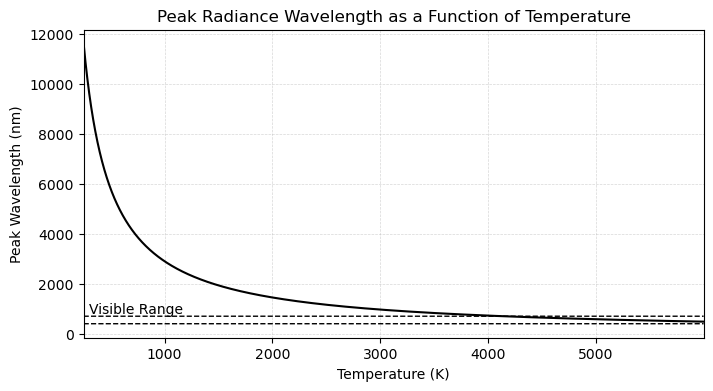

In [4]:
b = 2.898e-3
T = np.arange(250,6000)
lamb_peak = b/T

# make a plot
plt.figure(figsize=(8,4))
plt.plot(T, 400*np.ones_like(T), 'k--', linewidth=1)
plt.plot(T, 700*np.ones_like(T), 'k--', linewidth=1)
plt.text(np.min(T)+50, 800, 'Visible Range')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.plot(T,lamb_peak*1e9, 'k-')
plt.xlabel('Temperature (K)')
plt.ylabel('Peak Wavelength (nm)')
plt.gca().set_xlim([np.min(T), np.max(T)])
plt.title('Peak Radiance Wavelength as a Function of Temperature')
plt.show()